In [20]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

In [21]:
ct_test = pd.read_csv('clean6_car_price.csv') 
print(ct_test.shape)
ct_test.head()

(4812, 11)


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,0,1,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,1,0,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,1,0,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,1,1,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,1,0,1,2017.0,1197.0,5.0,-0.203643


In [22]:
mean_rate = ct_test['car_prices_in_rupee'].mean()

stdev_rate = ct_test['car_prices_in_rupee'].std(ddof=0)

In [23]:
print('Mean participation rate is {:.3f}'.format(mean_rate))
print('Standard deviation is {:.3f}'.format(stdev_rate))

Mean participation rate is 6.104
Standard deviation is 4.409


In [24]:
zscore_rate = ss.zscore(ct_test['car_prices_in_rupee'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,0,1,1,2017.0,1956.0,5.0,0.890501
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,1,0,1,2021.0,1330.0,5.0,1.525541
2,2,Toyota Camry 2.5 G,16.40,60343.0,1,0,1,2016.0,2494.0,5.0,2.335216
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,1,1,1,2016.0,1199.0,5.0,-0.216283
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,1,0,1,2017.0,1197.0,5.0,0.352985
5,6,Volkswagen Vento 1.2 TSI Highline Plus AT,7.58,43688.0,1,0,1,2017.0,1197.0,5.0,0.334841
6,7,Honda WR-V VX Diesel,11.60,14470.0,0,1,1,2021.0,1498.0,5.0,1.246577
7,8,Honda City i VTEC CVT SV,6.99,21429.0,1,0,1,2015.0,1497.0,5.0,0.201029


In [25]:
def plot_anomaly(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='Car Prize')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. car_prices_in_rupee', fontweight='bold')
    plt.xlabel('car_prices_in_rupee')
    plt.ylabel('Z-score')
    plt.show()

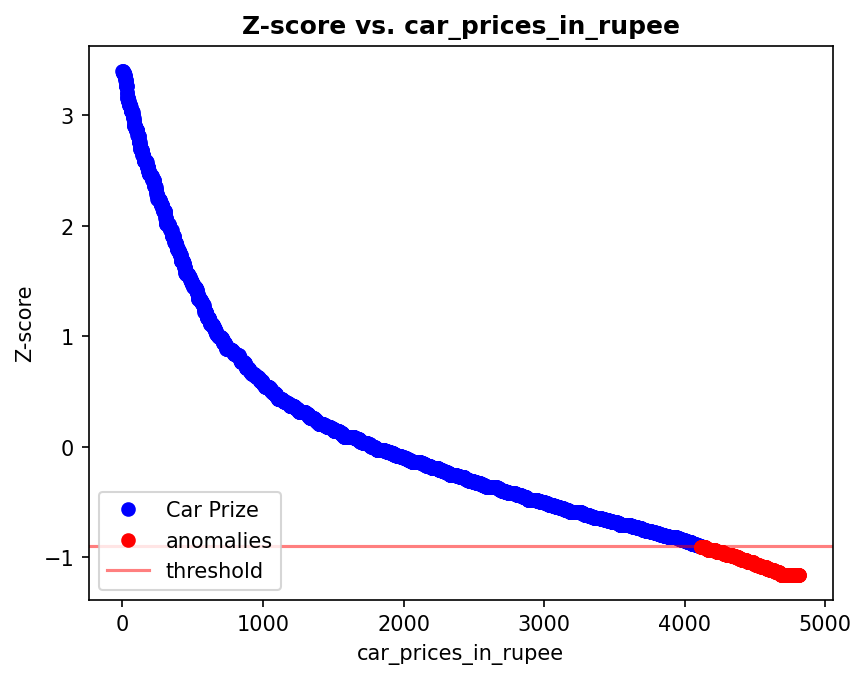

In [60]:
plot_anomaly(ct_test['zscore'], -0.9)

In [27]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -0.5)]
zscore_anomalies

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
17,19,Nissan Micra XL Optional,3.21,35894.0,1,1,2,2015.0,1198.0,5.0,-0.656275
20,22,Renault KWID RXT,3.11,48872.0,1,1,1,2017.0,799.0,5.0,-0.678955
21,23,Renault KWID RXL BSIV,3.70,17346.0,1,1,1,2019.0,799.0,5.0,-0.545143
24,26,Maruti Alto K10 LXI,2.23,62361.0,1,1,1,2014.0,998.0,5.0,-0.878539
31,35,Hyundai EON Era Plus,2.93,51085.0,1,1,1,2017.0,814.0,5.0,-0.719779
...,...,...,...,...,...,...,...,...,...,...,...
4789,5471,Hyundai i20 Magna,3.70,65000.0,1,1,1,2013.0,1968.0,5.0,-0.545143
4794,5477,Mahindra Logan Diesel 1.5 DLE,1.30,155000.0,0,1,3,2010.0,1248.0,4.0,-1.089463
4799,5485,Maruti Swift VDI BSIV,2.15,70000.0,0,1,1,2011.0,1991.0,5.0,-0.896683
4800,5486,Maruti Alto LXi,1.70,90000.0,1,1,2,2012.0,1995.0,5.0,-0.998743


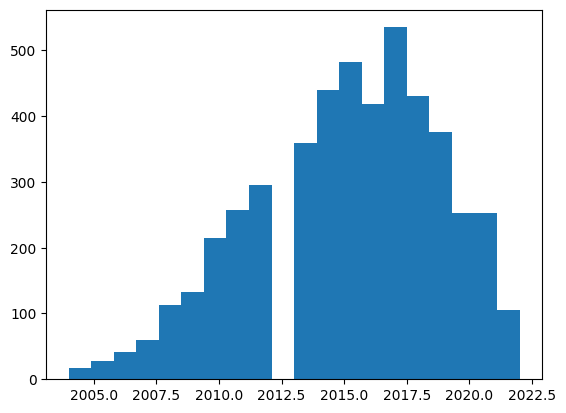

In [28]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['manufacture'], nbins, density=False,
                           cumulative=False, linewidth=1.0, label='data')

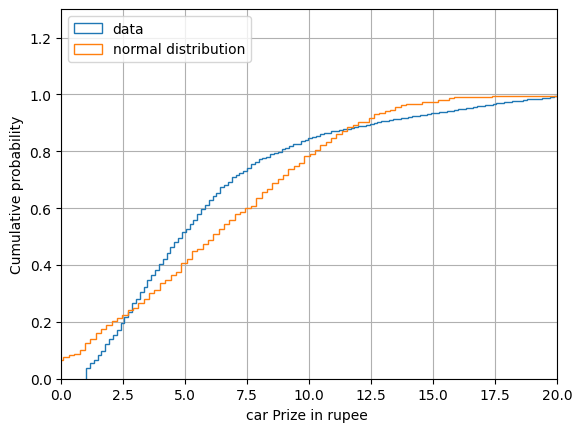

In [48]:
num_bins = 130
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(500)]
n, bins, patches = plt.hist(ct_test['car_prices_in_rupee'], num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='data')
plt.hist(normal_dist, num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim([0,1.3])
axes.set_xlim([0,20.0])

plt.xlabel('car Prize in rupee ')
plt.ylabel('Cumulative probability')
plt.show()

In [49]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [50]:
mad_zscore, mad_participation = modified_zscore(ct_test['car_prices_in_rupee'])
z_sc_participation = ct_test.assign(zscore_median=mad_zscore)

In [51]:
mod_zscore_anomalies = z_sc_participation[(z_sc_participation['zscore_median'] < -1)]
mod_zscore_anomalies

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore,zscore_median
60,68,Maruti A-Star Zxi,1.53,46257.0,1,1,3,2008.0,998.0,5.0,-1.037299,-1.029245
65,73,Chevrolet Beat Diesel PS,1.10,150349.0,0,1,1,2012.0,936.0,5.0,-1.134823,-1.160185
152,178,Honda Jazz Active,1.30,90000.0,1,1,3,2009.0,1198.0,5.0,-1.089463,-1.099283
168,197,Tata Indica eV2 DL BSIII,1.00,120000.0,0,1,2,2013.0,1396.0,5.0,-1.157503,-1.190636
173,203,Hyundai Santro GS zipDrive - Euro II,1.35,60000.0,1,1,2,2006.0,999.0,5.0,-1.078123,-1.084057
...,...,...,...,...,...,...,...,...,...,...,...,...
4758,5430,Hyundai i10 Sportz,1.50,70000.0,1,1,1,2010.0,1497.0,5.0,-1.044103,-1.038381
4772,5449,Hyundai Santro Xing GLS,1.10,70000.0,1,1,2,2008.0,1527.0,4.0,-1.134823,-1.160185
4777,5455,Chevrolet Beat Diesel LT,1.40,110000.0,0,1,1,2013.0,2184.0,5.0,-1.066783,-1.068832
4778,5457,Maruti Zen D,1.00,120000.0,0,1,3,2005.0,1248.0,5.0,-1.157503,-1.190636


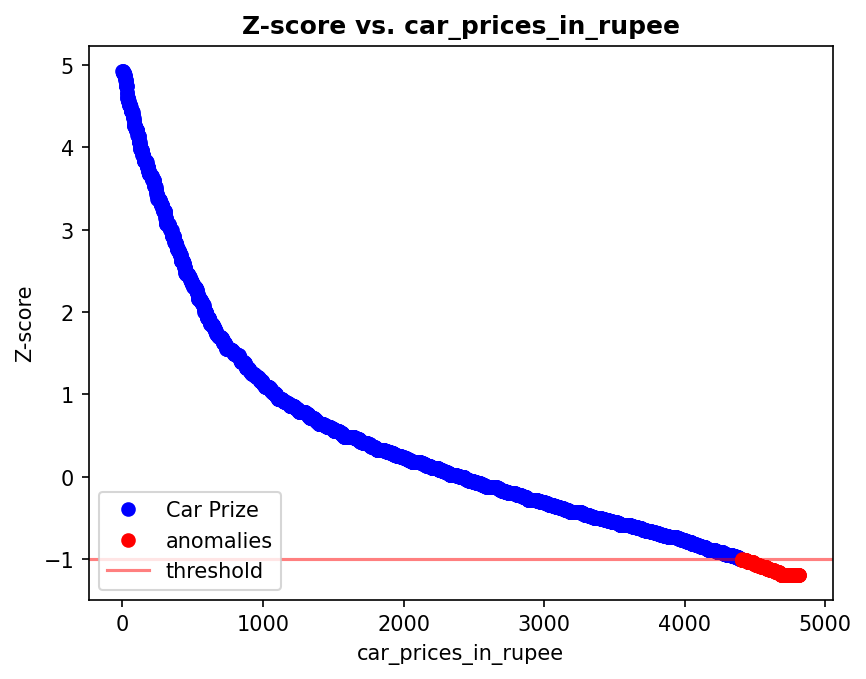

In [52]:
plot_anomaly(z_sc_participation['zscore_median'], -1)

In [53]:
z_sc_participation['zscore_median'].describe()

count    4812.000000
mean        0.363472
std         1.342779
min        -1.190636
25%        -0.590750
50%         0.000000
75%         0.864810
max         4.930025
Name: zscore_median, dtype: float64

In [54]:
z_sc_participation['zscore'].describe()

count    4.812000e+03
mean     4.725139e-17
std      1.000104e+00
min     -1.157503e+00
25%     -7.107067e-01
50%     -2.707149e-01
75%      3.733970e-01
max      3.401176e+00
Name: zscore, dtype: float64

In [55]:
ct_test.to_csv("clean3_car_price.csv", index=False)
